# Bussiness Case:

> FicZon Inc, an IT solutions company offering both on-premise and SaaS products, relies heavily on digital channels—especially its website—for generating leads.

> A large part of its business success depends on how effectively the sales team performs. However, as the market becomes more competitive with new players entering, FicZon has started to see a decline in sales.

>  One key factor in driving sales is the quality of leads. Currently, leads are categorized manually, relying a lot on the judgment of sales staff.

> While there is a system in place to review and improve lead categorization, it’s mostly useful for reviewing past performance, not for making real-time decisions.

> FicZon now wants to use Machine Learning to automatically assess lead quality upfront, which they hope will significantly improve sales performance.

In [1]:
# importing the libraries

import os                         # importing the os for way to interact with the operation system.
import mysql.connector            # importing the mysql.connector interaction with MySQL databases.
import pandas as pd               # importing the pandas for analyzing, cleaning, exploring, and manipulating data.
import numpy as np                # importing the numpy for mathematical opeartions on arrays and matrices.
import seaborn as sns             # importing the seaborn for data visualization.
import matplotlib.pyplot as plt   # import the matplotlib for create plots and graphs.

In [2]:
import warnings                    # We used to warnings for ignore warning messages.
warnings.filterwarnings('ignore') 

In [3]:
# Making connection to database server
connection=mysql.connector.connect(host='18.136.157.135',
                                   user='dm_team2',
                                   password='DM!$Team&27@9!20!')

In [4]:
# connection on database

cursor=connection.cursor()
cursor.execute('show databases') # Check the number of daatbases availabel on the server
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
connection=mysql.connector.connect(host='18.136.157.135',
                                   user='dm_team2',
                                   password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
connection

In [7]:
# show the table
pd.read_sql_query('show tables',connection)

,Tables_in_project_sales
0,data


In [8]:
# Retrieve data from the data table into a pandas Dataframe
data=pd.read_sql_query('select*from data',connection)

In [9]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Information about Variables

1. Created:
* The date and time when the inquiry or product entry was made. Useful for analyzing trends over time, like peak inquiry periods.

2. Product_ID:
* A unique code for each product or inquiry. Can help track popular or frequently requested products.

3. Source:
* Where the inquiry came from (e.g., Website, Call, Live Chat). Helps identify which channels bring in the most leads.

4. Mobile:
* Shows if contact details include a mobile number. Can be used to study mobile-based inquiries or outreach trends.

5.  EMAIL:
* The email address linked to the inquiry. Useful for identifying duplicates, tracking patterns, or connecting inquiries to agents.

6. Sales_Agent:
* The staff member handling the inquiry. Helps analyze agent workload and performance.

7. Location:
* The customer’s region or city. Supports regional performance analysis and targeted strategies.

8. Delivery_Mode:
* The method of delivering the service or product. Different modes may reflect standard, express, or premium services.

9. Status:
* The current stage of the inquiry or lead:

* Open: New inquiry, no action yet

* Potential: Might convert

* In Progress Positive: Being worked on with good chances

* Not Responding: No reply from customer

* Just Enquiry: Info-only, no intent yet

* Junk Lead: Low-quality or irrelevant lead

* Converted: Successfully turned into a sale

* In Progress Negative: Progressing but likely to fail

* LOST: Lead was dropped or ended

* Long Term: Possible future opportunity

# Basic Check

In [10]:
data.head() # Display the first 5 rows of the dataset to get an overview of the structure and values

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [11]:
data.tail() # Display the last 5 rows of the dataset to get an overview of the structure and values

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [12]:
data.info() # Display summary information about the dataset including column names, not-null counts and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [13]:
data.describe() # Generate summry statistics for numerical columns such as count,unique, top and freq

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


# Data Cleaning

### Handle Missing values:

In [14]:
data.isnull().sum() # Count Missing values

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

* No Missing Data: All columns (Created, Product_ID, Source, Mobile, EMAIL, Sales_Agent, Location, Delivery_Mode, and Status) have zero missing values. This means the dataset is complete with no gaps in any field, which is ideal for analysis and model building.

In [15]:
data['Created']=pd.to_datetime(data['Created'],errors='coerce')

In [16]:
# Extract the 'Day','Month','Month',and 'Weekday' from the 'Created' column
data['Day']=data['Created'].dt.day            # Extract day of the month from 'Created'
data['Month']=data['Created'].dt.month        # Extract month from 'Created'
data['Hour']=data['Created'].dt.hour          # Extract hour from 'Created' (useful for time-based analysis)
data['Weekday']=data['Created'].dt.day_name() # Extract the day name (e.g.- 'Monday','Tuesday') from 'Created'


In [17]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Hour,Weekday
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14,11,10,Wednesday
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14,11,9,Wednesday
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14,11,9,Wednesday
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14,11,8,Wednesday
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14,11,7,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28,4,9,Saturday
7418,2018-04-28 09:43:00,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28,4,9,Saturday
7419,2018-04-28 09:20:00,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28,4,9,Saturday
7420,2018-04-28 08:04:00,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28,4,8,Saturday


# EDA

*  EDA (Exploratory Data Analysis) involves summarizing the dataset's main characteristics, often with visualizations, to understand patterns, relationships, and outliers. It helps in identifying data quality issues and informs feature engineering and model selection.

* The main types of data analysis in EDA are:

1. Univariate Analysis: Analyzing a single variable's distribution (e.g., using histograms, boxplots).

2. Bivariate Analysis: Exploring relationships between two variables (e.g., scatter plots, correlation heatmaps).

3. Multivariate Analysis: Analyzing interactions among three or more variables (e.g., pairplots, 3D scatter plots).

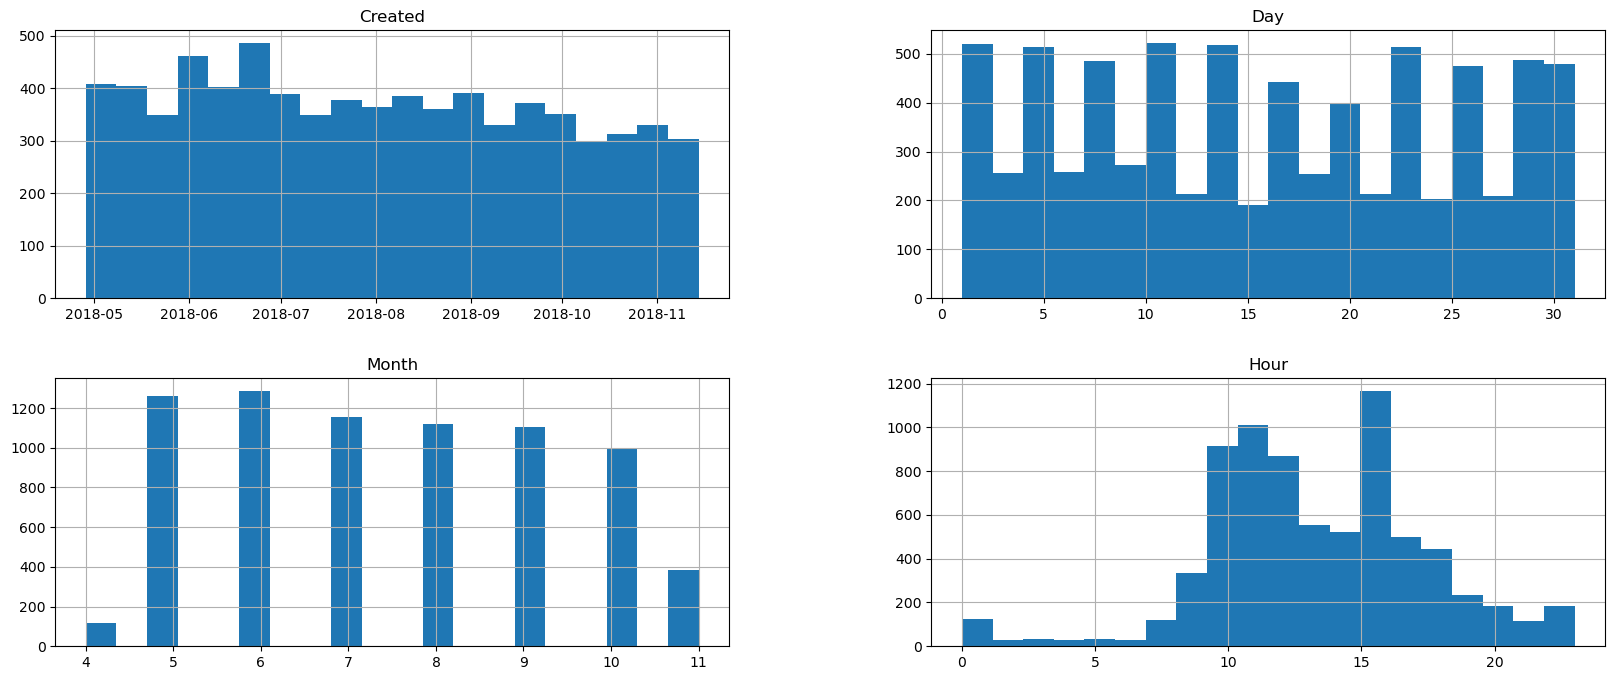

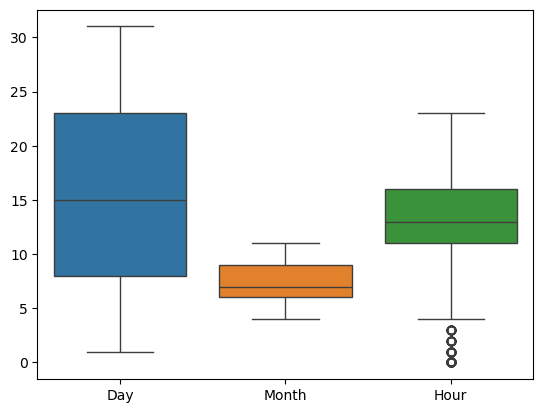

In [18]:
# Histograqm for numerical features
data.hist(figsize=(20,8),bins=20)
plt.show()

# Boxplot to deetect outliers in numderical features
sns.boxplot(data=data)
plt.show()


* The histogram shows the distribution, skewness, and potential outliers of numerical features. The boxplot highlights the spread, median, and identifies outliers, helping detect extreme values in the data.

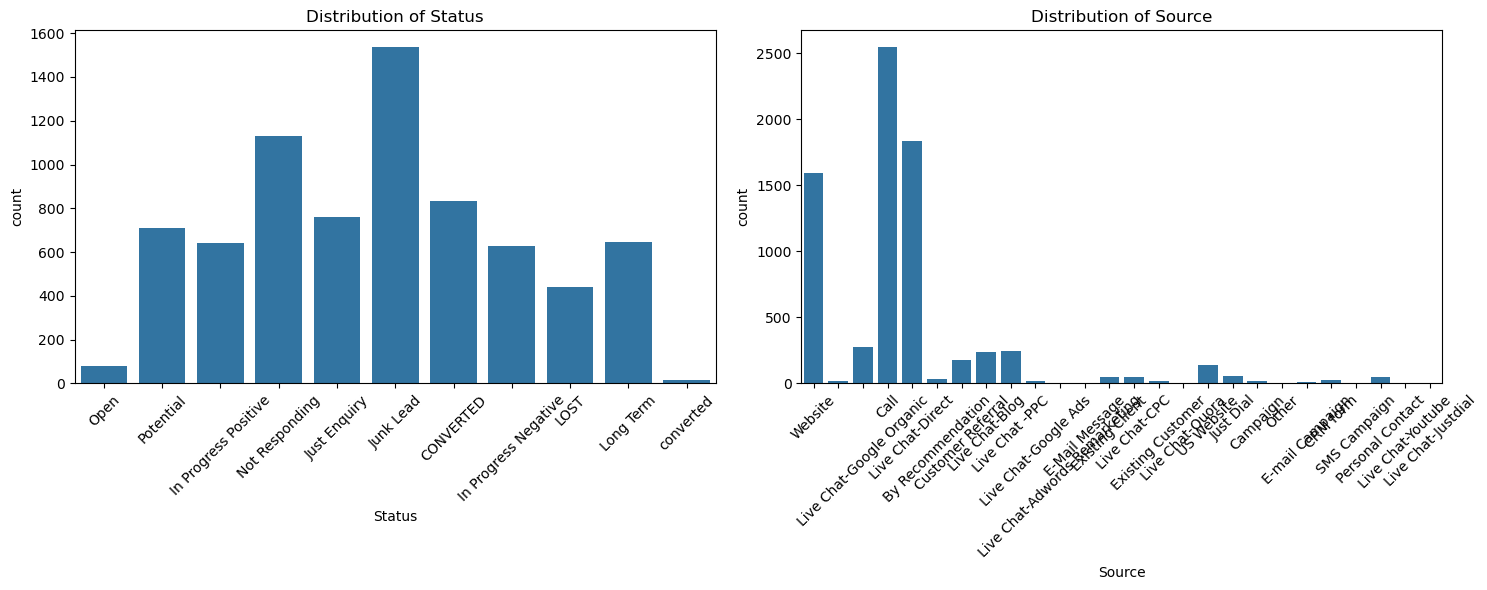

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot for 'Status'
sns.countplot(x='Status', data=data, ax=axes[0])
axes[0].set_title('Distribution of Status')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Count plot for 'Source'
sns.countplot(x='Source', data=data, ax=axes[1])
axes[1].set_title('Distribution of Source')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap of titles/labels
plt.tight_layout()

# Display the plots
plt.show()



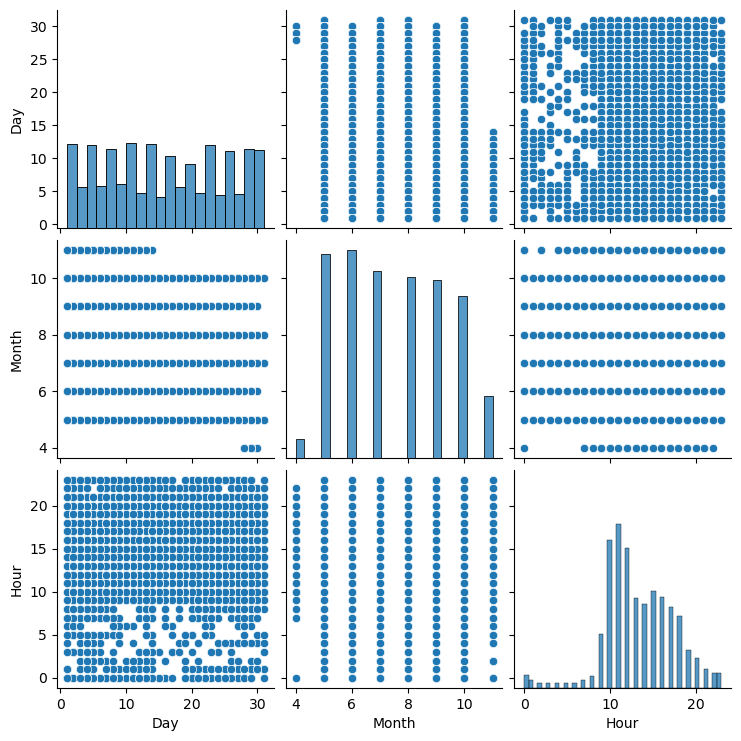

In [20]:
# Pairplot for numerical column like Day,Month,Hour
sns.pairplot(data[['Day','Month','Hour']])
plt.show()

* The pairplot shows the relationships between 'Day', 'Month', and 'Hour', helping identify any correlations or patterns between these time-based features. It can reveal trends or clusters based on time variables.

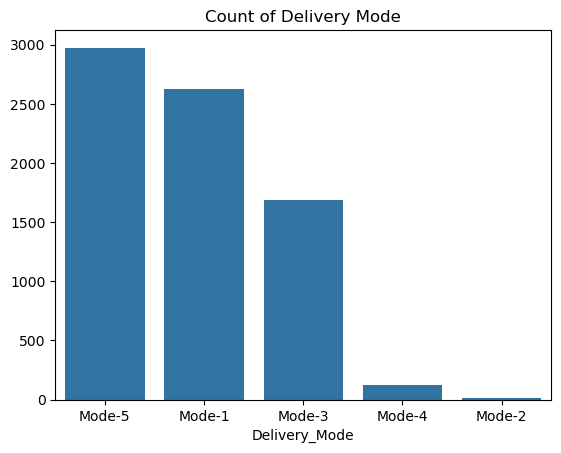

In [21]:
# Barplot for count of different 'Delivery_Mode'
sns.barplot(x=data['Delivery_Mode'].value_counts().index,y=data["Delivery_Mode"].value_counts().values)
plt.title('Count of Delivery Mode')
plt.show()

* The bar plot shows the distribution of different delivery modes, highlighting which delivery methods are most and least frequently used. It helps identify the most common delivery modes and potential areas for optimization.

In [22]:
# This is handling missing or invalid values represented by empty or blank strings.
data['Source']=data['Source'].replace([""," "],np.nan)

In [23]:
# This .isnull().sum() function counts number of NaN values in 'Source' column after the replacement
print("Number of Nan value:",data['Source'].isnull().sum())

Number of Nan value: 17


In [24]:
# This is handling missing or invalid values represented by empty or blank strings.
data['Location']=data['Location'].replace(["",""],np.nan)

In [25]:
# This .isnull().sum() function counts number of NaN values in 'Location' column after the replacement
print("Number of Nan value:",data['Location'].isnull().sum())

Number of Nan value: 58


In [26]:
# This is handling missing or invalid values represented by empty or blank strings.
data['EMAIL']=data['EMAIL'].replace(["",""],np.nan)

In [27]:
# This .isnull().sum() function counts number of NaN values in 'EMAIL' column after the replacement
print("Number of Nan value:",data['EMAIL'].isnull().sum())

Number of Nan value: 0


In [28]:
# This is handling missing or invalid values represented by empty or blank strings.
data['Mobile']=data['Mobile'].replace(["",""],np.nan)

In [29]:
#This .isnull().sum() function counts number of NaN values in 'Mobile' column after the replacment
print("Number of Nan vlaue:",data["Mobile"].isnull().sum())

Number of Nan vlaue: 1810


In [30]:
# This is handling missing or invalid vlaues represented by empty or blank strings.
data["Sales_Agent"]=data["Sales_Agent"].replace(["",""],np.nan)

In [31]:
# This .isnull().sum() function counts number of NaN value in 'Sales_Agent' column after the replacement
print("Number of Nan value:",data['Sales_Agent'].isnull().sum())

Number of Nan value: 23


In [32]:
data.isnull().sum()

Created             0
Product_ID          0
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
Day                 0
Month               0
Hour                0
Weekday             0
dtype: int64

In [33]:
# Count the frequency of each unique value in the 'Source' column.
data.Source.value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [34]:
# Count the frequency of each unique value in the 'EMAIL' column.
data.EMAIL.value_counts()

EMAIL
#VALUE!               1701
sXXXXXXX@gmail.com     781
aXXXXXXX@gmail.com     445
rXXXXXXX@gmail.com     342
mXXXXXXX@gmail.com     305
                      ... 
dXXXXXXXwal@bt.com       1
uXXXXXXXectric.com       1
dXXXXXXX9@gmail.co       1
pXXXXXXXamaris.com       1
mXXXXXXXengira.com       1
Name: count, Length: 883, dtype: int64

In [35]:
# Count the frequency of each unique value in the 'Sales_Agent' column.
data.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [36]:
# Count the frequency of each unique value in the 'Location' column.
data.Location.value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [37]:
# Count the frequency of each unique value in the 'Mobile' column.
data.Mobile.value_counts()

Mobile
XXXXXXX       222
988XXXXXXX    211
984XXXXXXX    177
998XXXXXXX    125
994XXXXXXX    112
             ... 
747XXXXXXX      1
124XXXXXXX      1
031XXXXXXX      1
(31XXXXXXX      1
9535207621      1
Name: count, Length: 486, dtype: int64

In [38]:
# Remove Null value in Source column.
data.loc[data["Source"].isnull(),"Source"]="Call"  # Here we are imputing missing value using 'call'

In [39]:
# Remove Null vlaue in Location column
data.loc[data["Location"].isnull(),"Location"]="Other Location" # Here we are imputing missing value using 'Other Location'

In [40]:
# Remove Null value in Mobile column.
data.loc[data["Mobile"].isnull(),"Mobile"]="Unknown"   # Here we are imputing missing value using "Unknown"

In [41]:
# Remove Null value in Sales_Agent column.
data.loc[data["Sales_Agent"].isnull(),"Sales_Agent"]="Sales-Agent-4" # Here we are imputing missing value using "Sales-Agent-4"

In [42]:
data.drop(columns=["EMAIL","Mobile"],axis=1,inplace=True)

In [43]:
data

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Hour,Weekday
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,Other Location,Mode-5,Open,14,11,10,Wednesday
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,Other Location,Mode-5,Open,14,11,9,Wednesday
2,2018-11-14 09:21:00,,Website,Sales-Agent-10,Other Location,Mode-5,Open,14,11,9,Wednesday
3,2018-11-14 08:46:00,,Website,Sales-Agent-10,Other Location,Mode-5,Open,14,11,8,Wednesday
4,2018-11-14 07:34:00,,Website,Sales-Agent-10,Other Location,Mode-5,Open,14,11,7,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST,28,4,9,Saturday
7418,2018-04-28 09:43:00,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST,28,4,9,Saturday
7419,2018-04-28 09:20:00,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28,4,9,Saturday
7420,2018-04-28 08:04:00,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28,4,8,Saturday


* Encoding Categorical Variables : Categorical variables need to be transformed into numerical formats for machine learning models.

* Label Encoding
* One-Hot Encoding
* Ordinal Encoding

In [44]:
# Step-2 : Convert to categorical data to numerical data

In [45]:
# Importing OneHotEncoder from processing
from sklearn.preprocessing import OneHotEncoder
OHE=pd.get_dummies(data.Delivery_Mode,dtype=int,prefix="Delivery")
# Here we are apply OneHot Encoding on Delivery_Mode features and store in OHE variable.

In [46]:
# Here we are merging of Delivery_Mode column and data into data. Now, we don't need that feature we will drop.
data=pd.concat([data,OHE],axis=1)

In [47]:
data.drop(columns=["Delivery_Mode"],axis=1,inplace=True)  # Drop Delivery_Mode Column

In [48]:
# importing LabelEncoder from preprocessing
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()                          # Initialize the LableEncoder

# List of columns to Encode
label_encoder=['Source','Sales_Agent','Location','Status']

In [49]:
# Apply LabelEncoder to each column in the list
for column in label_encoder:
            data[column]=label.fit_transform(data[column])

In [50]:
# drop column of Created
data.drop(columns=['Created'],axis=1,inplace=True)  # Drop Delivery_Mode column

* Handling Outliers : Outliers can significantly impact the performance of machine learning models.

In [51]:
df=data[["Source","Day","Hour"]] # Here we are starting continuos features in data

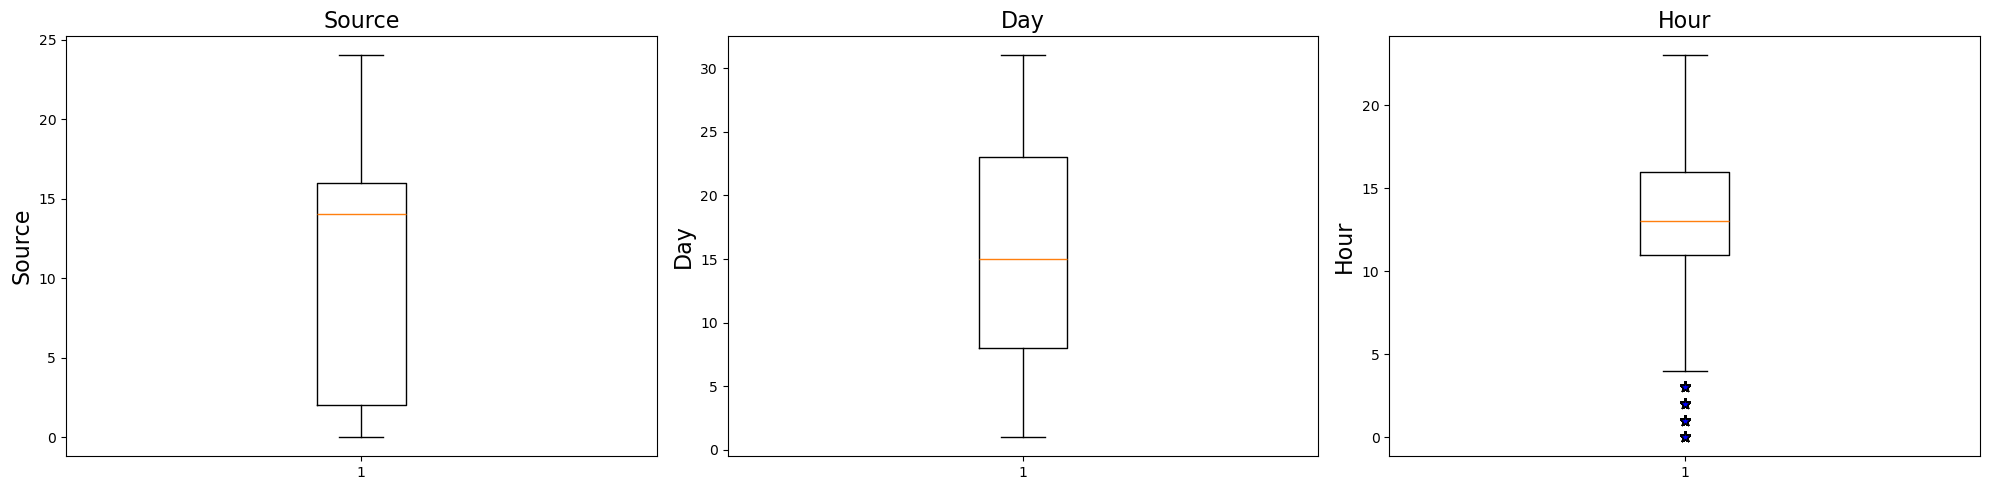

In [55]:
# Here We are running a for loop for plot boxplot for all continuos features.
plt.figure(figsize=(20,5))                # Define a figure size
plot_num=1

# Creating the boxplot with customized filter points
flierprops=dict(marker='*',markerfacecolor='blue',markersize=8)

for i in df:
    if plot_num<=3:
        plt.subplot(1,3,plot_num)                   # Create roe and column grid in 1x3
        plt.boxplot(df[i],flierprops=flierprops)  # Creating the boxplot using of check outliers with filter
        plt.title(i,fontsize=16)                   # Show title
        plt.ylabel(i,fontsize=16)                  # y-axis label
        plot_num+=1
plt.tight_layout()             # Show the data

In [56]:
q1=df.Hour.quantile(0.25)
q3=df.Hour.quantile(0.75)
iqr=q3 - q1
lower_boundary=q1-1.5*iqr
upper_boundary=q3+1.5*iqr

In [57]:
df.loc[df['Hour']<lower_boundary,'Hour']

12      2
159     0
253     2
261     0
305     2
       ..
7172    0
7220    0
7305    3
7306    1
7389    0
Name: Hour, Length: 185, dtype: int32

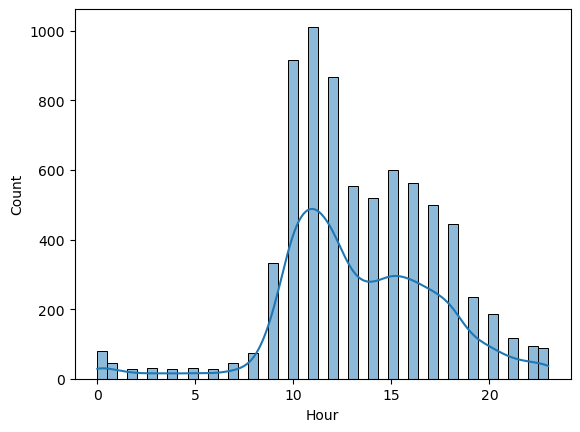

In [58]:
sns.histplot(df.Hour,kde=True)
plt.show()

* This graph does not follow normal distribution for that reason we use Median.

In [59]:
df.Hour.median()

13.0

<function matplotlib.pyplot.show(close=None, block=None)>

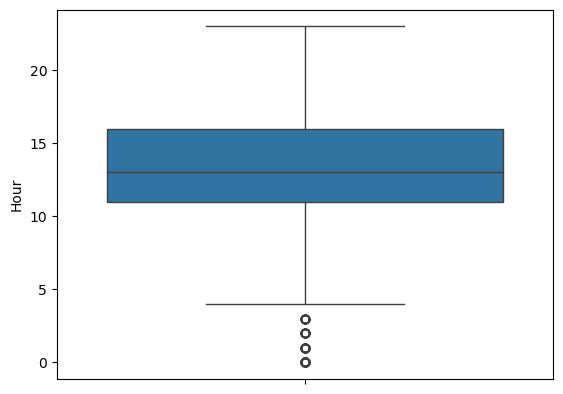

In [60]:
sns.boxplot(data.Hour)
plt.show

In [61]:
df.loc[df["Hour"]<lower_boundary,"Hour"]

12      2
159     0
253     2
261     0
305     2
       ..
7172    0
7220    0
7305    3
7306    1
7389    0
Name: Hour, Length: 185, dtype: int32

In [62]:
data

,Product_ID,Source,Sales_Agent,Location,Status,Day,Month,Hour,Weekday,Delivery_Mode-1,Delivery_Mode-2,Delivery_Mode-3,Delivery_Mode-4,Delivery_Mode-5
0,,24,2,10,8,14,11,10,Wednesday,0,0,0,0,1
1,,24,1,10,8,14,11,9,Wednesday,0,0,0,0,1
2,,24,1,10,8,14,11,9,Wednesday,0,0,0,0,1
3,,24,1,10,8,14,11,8,Wednesday,0,0,0,0,1
4,,24,1,10,8,14,11,7,Wednesday,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,2,8,9,5,28,4,9,Saturday,0,0,0,1,0
7418,15,2,3,11,5,28,4,9,Saturday,0,0,0,0,1
7419,5,14,2,1,7,28,4,9,Saturday,1,0,0,0,0
7420,21,1,6,11,4,28,4,8,Saturday,1,0,0,0,0


* Scalling : Scaling is very important of continous features because some model give more priproty to that features which has higest values campare to another features. that's why we use Scaling to make all values into certain ranges.scaling technique can significantly improve the efficiency and accuracy of your model.It help improve the performance and accuracy of machine learning models.

* It is technique to convert all data into certain range.

* The types of scalling are :
1) Min-Max Scaling : Min-Max scaling transforms the data to a specific range, usually between 0 and 1. The values are rescaled according to the minimum and maximum values of the feature.
2) Standardization : - Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.

In [63]:
# Step 4: feature Scalling
from sklearn.preprocessing import StandardScaler   # Importing StandardScaler from preprocssing
standard=StandardScaler()                          # Define the StandardScaler object

In [64]:
data

,Product_ID,Source,Sales_Agent,Location,Status,Day,Month,Hour,Weekday,Delivery_Mode-1,Delivery_Mode-2,Delivery_Mode-3,Delivery_Mode-4,Delivery_Mode-5
0,,24,2,10,8,14,11,10,Wednesday,0,0,0,0,1
1,,24,1,10,8,14,11,9,Wednesday,0,0,0,0,1
2,,24,1,10,8,14,11,9,Wednesday,0,0,0,0,1
3,,24,1,10,8,14,11,8,Wednesday,0,0,0,0,1
4,,24,1,10,8,14,11,7,Wednesday,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,2,8,9,5,28,4,9,Saturday,0,0,0,1,0
7418,15,2,3,11,5,28,4,9,Saturday,0,0,0,0,1
7419,5,14,2,1,7,28,4,9,Saturday,1,0,0,0,0
7420,21,1,6,11,4,28,4,8,Saturday,1,0,0,0,0


In [65]:
# Here we are taking all columns where we have to apply scalling
sc=["Source","Sales_Agent","Location","Status","Month","Day","Hour"]

In [67]:
# Here we are applying Standard Scalling
data1=standard.fit_transform(data[sc])

In [68]:
data1

array([[ 1.45090507e+00, -1.40369470e+00,  8.09474033e-01, ...,
         1.86429352e+00, -1.82295088e-01, -8.21830620e-01],
       [ 1.45090507e+00, -1.75487862e+00,  8.09474033e-01, ...,
         1.86429352e+00, -1.82295088e-01, -1.06841967e+00],
       [ 1.45090507e+00, -1.75487862e+00,  8.09474033e-01, ...,
         1.86429352e+00, -1.82295088e-01, -1.06841967e+00],
       ...,
       [ 2.80632142e-01, -1.40369470e+00, -1.10373970e+00, ...,
        -1.86371947e+00,  1.36638597e+00, -1.06841967e+00],
       [-1.24072267e+00,  1.04096553e-03,  1.02205334e+00, ...,
        -1.86371947e+00,  1.36638597e+00, -1.31500873e+00],
       [ 1.45090507e+00, -3.50142952e-01, -8.91160395e-01, ...,
        -1.86371947e+00,  1.36638597e+00, -1.56159778e+00]])

In [69]:
data.drop(columns='Weekday',axis=1,inplace=True)

In [70]:
data

,Product_ID,Source,Sales_Agent,Location,Status,Day,Month,Hour,Delivery_Mode-1,Delivery_Mode-2,Delivery_Mode-3,Delivery_Mode-4,Delivery_Mode-5
0,,24,2,10,8,14,11,10,0,0,0,0,1
1,,24,1,10,8,14,11,9,0,0,0,0,1
2,,24,1,10,8,14,11,9,0,0,0,0,1
3,,24,1,10,8,14,11,8,0,0,0,0,1
4,,24,1,10,8,14,11,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,2,8,9,5,28,4,9,0,0,0,1,0
7418,15,2,3,11,5,28,4,9,0,0,0,0,1
7419,5,14,2,1,7,28,4,9,1,0,0,0,0
7420,21,1,6,11,4,28,4,8,1,0,0,0,0


In [71]:
data.corr(numeric_only=True)

,Source,Sales_Agent,Location,Status,Day,Month,Hour,Delivery_Mode-1,Delivery_Mode-2,Delivery_Mode-3,Delivery_Mode-4,Delivery_Mode-5
Source,1.000000,-0.030753,0.054946,0.060952,-0.037084,0.026615,0.126722,0.053040,-0.012141,0.185290,-0.072071,-0.190663
Sales_Agent,-0.030753,1.000000,-0.134712,-0.057335,-0.007635,0.097295,-0.029807,0.193819,0.008650,0.039057,0.013585,-0.226720
Location,0.054946,-0.134712,1.000000,0.097546,-0.014121,0.068761,-0.083514,-0.430395,0.028952,0.147638,-0.032399,0.299786
Status,0.060952,-0.057335,0.097546,1.000000,0.012677,0.128179,0.001013,-0.076449,-0.013503,0.033316,-0.081991,0.068347
Day,-0.037084,-0.007635,-0.014121,0.012677,1.000000,-0.135487,-0.002339,-0.037624,-0.010510,-0.009306,0.014664,0.041708
Month,0.026615,0.097295,0.068761,0.128179,-0.135487,1.000000,-0.040089,-0.206340,0.025192,0.198730,-0.017245,0.033838
Hour,0.126722,-0.029807,-0.083514,0.001013,-0.002339,-0.040089,1.000000,0.072171,-0.003162,0.044881,0.010162,-0.111188
Delivery_Mode-1,0.053040,0.193819,-0.430395,-0.076449,-0.037624,-0.206340,0.072171,1.000000,-0.028516,-0.401599,-0.095288,-0.605405
Delivery_Mode-2,-0.012141,0.008650,0.028952,-0.013503,-0.010510,0.025192,-0.003162,-0.028516,1.000000,-0.020903,-0.004960,-0.031511
Delivery_Mode-3,0.185290,0.039057,0.147638,0.033316,-0.009306,0.198730,0.044881,-0.401599,-0.020903,1.000000,-0.069849,-0.443780


In [72]:
# Define high and low potential status categories
high_potential_statuses=[
    "CONVERTED","Potential","In Progress Positive","converted"
]

low_potential_statuses=[
    "Junk Lead","Not Responding","Just Enquiry","Long Term",
    "In Progress Negative","Lost","Open"
]

# Assign 'High Potential' or 'Low Potential' based on Status
data.loc[data["Status"].isin(high_potential_statuses),'Status']="High Potential"
data.loc[data["Status"].isin(low_potential_statuses),'Status']="Low Potential"

# Convert to binary : 1 for High, o for Low
data['Status'].replace({"Low Potential":0,"High Potential":1},inplace=True)


* The code categorizes sales inquiries into "High Potential" (1) and "Low Potential" (0) based on their status. This simplifies the data for further analysis or machine learning.
* It helps prioritize high-potential leads for sales efforts. The binary transformation makes the data suitable for algorithms that require numeric input.

In [74]:
data

,Product_ID,Source,Sales_Agent,Location,Status,Day,Month,Hour,Delivery_Mode-1,Delivery_Mode-2,Delivery_Mode-3,Delivery_Mode-4,Delivery_Mode-5
0,,24,2,10,8,14,11,10,0,0,0,0,1
1,,24,1,10,8,14,11,9,0,0,0,0,1
2,,24,1,10,8,14,11,9,0,0,0,0,1
3,,24,1,10,8,14,11,8,0,0,0,0,1
4,,24,1,10,8,14,11,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,2,8,9,5,28,4,9,0,0,0,1,0
7418,15,2,3,11,5,28,4,9,0,0,0,0,1
7419,5,14,2,1,7,28,4,9,1,0,0,0,0
7420,21,1,6,11,4,28,4,8,1,0,0,0,0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product_ID       7422 non-null   object
 1   Source           7422 non-null   int32 
 2   Sales_Agent      7422 non-null   int32 
 3   Location         7422 non-null   int32 
 4   Status           7422 non-null   int64 
 5   Day              7422 non-null   int32 
 6   Month            7422 non-null   int32 
 7   Hour             7422 non-null   int32 
 8   Delivery_Mode-1  7422 non-null   int32 
 9   Delivery_Mode-2  7422 non-null   int32 
 10  Delivery_Mode-3  7422 non-null   int32 
 11  Delivery_Mode-4  7422 non-null   int32 
 12  Delivery_Mode-5  7422 non-null   int32 
dtypes: int32(11), int64(1), object(1)
memory usage: 435.0+ KB


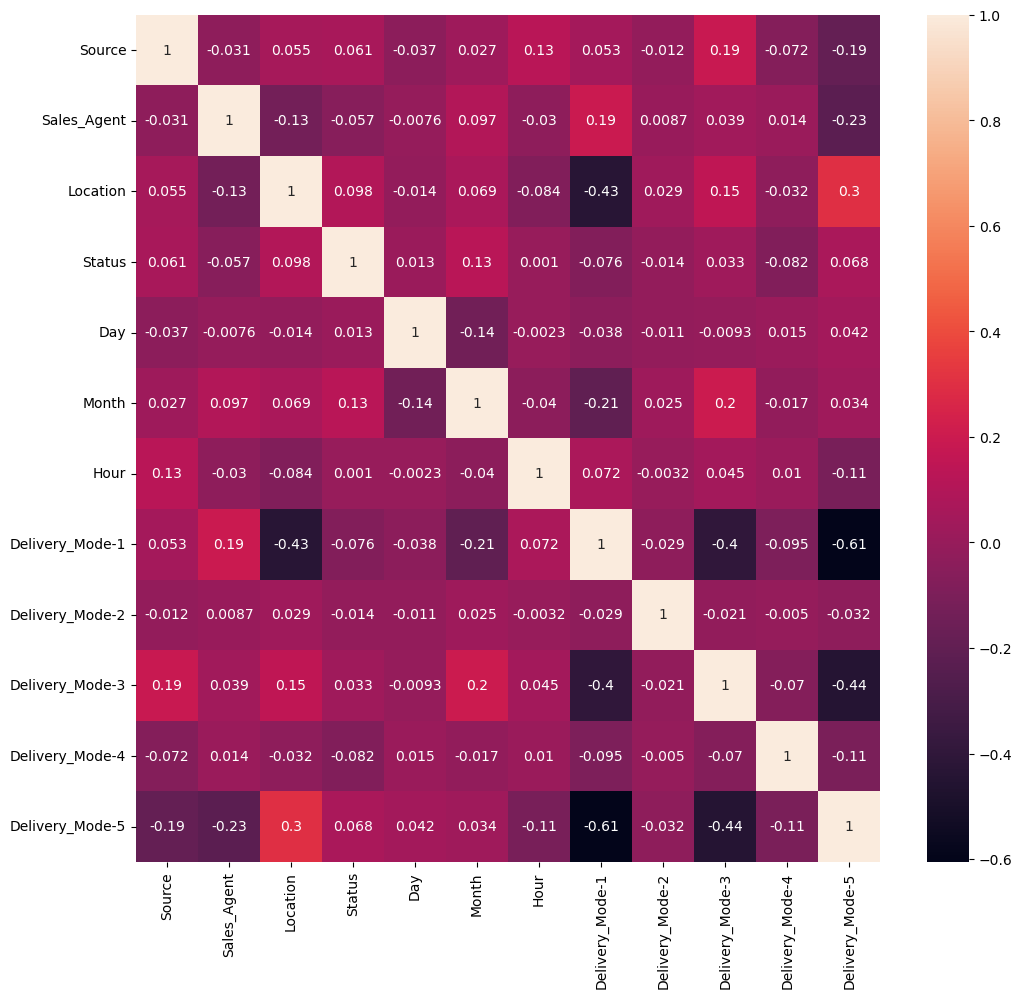

In [77]:
# Drop 'Product_ID' column permanetly using inplace=True
data.drop(columns=["Product_ID"],inplace=True)

# Continue with the correlation calculation and heatmap plotting
numerical_data=data.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(12,11))
sns.heatmap(numerical_data.corr(),annot=True,annot_kws={'size':10})
plt.show()


* Dropping Product_ID removes irrelevant categorical data, allowing you to focus on numeric relationships.

*   The correlation matrix reveals key insights, such as how variables like Sales_Agent, Month, and Status interact. This helps in identifying patterns, multicollinearity, and preparing the data for further analysis or modeling.

In [78]:
data

,Source,Sales_Agent,Location,Status,Day,Month,Hour,Delivery_Mode-1,Delivery_Mode-2,Delivery_Mode-3,Delivery_Mode-4,Delivery_Mode-5
0,24,2,10,8,14,11,10,0,0,0,0,1
1,24,1,10,8,14,11,9,0,0,0,0,1
2,24,1,10,8,14,11,9,0,0,0,0,1
3,24,1,10,8,14,11,8,0,0,0,0,1
4,24,1,10,8,14,11,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7417,2,8,9,5,28,4,9,0,0,0,1,0
7418,2,3,11,5,28,4,9,0,0,0,0,1
7419,14,2,1,7,28,4,9,1,0,0,0,0
7420,1,6,11,4,28,4,8,1,0,0,0,0


# Model Creation

In [79]:
# Creating independent and dependent variable
x=data.drop(["Status"],axis=1)
y=data.Status

In [80]:
x

,Source,Sales_Agent,Location,Day,Month,Hour,Delivery_Mode-1,Delivery_Mode-2,Delivery_Mode-3,Delivery_Mode-4,Delivery_Mode-5
0,24,2,10,14,11,10,0,0,0,0,1
1,24,1,10,14,11,9,0,0,0,0,1
2,24,1,10,14,11,9,0,0,0,0,1
3,24,1,10,14,11,8,0,0,0,0,1
4,24,1,10,14,11,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7417,2,8,9,28,4,9,0,0,0,1,0
7418,2,3,11,28,4,9,0,0,0,0,1
7419,14,2,1,28,4,9,1,0,0,0,0
7420,1,6,11,28,4,8,1,0,0,0,0


In [81]:
y

0       8
1       8
2       8
3       8
4       8
       ..
7417    5
7418    5
7419    7
7420    4
7421    0
Name: Status, Length: 7422, dtype: int64

# PCA

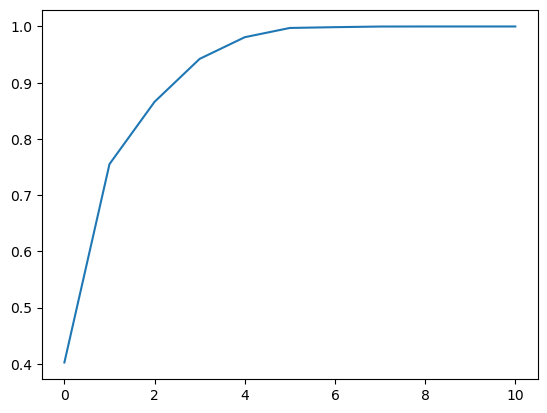

In [82]:
from sklearn.decomposition import PCA                # Import the PCA class from sklearn.decomposition
pca=PCA()                                            # create instance of pca
principal_components=pca.fit_transform(x)            # fit the PCA model to the data
plt.plot(np.cumsum(pca.explained_variance_ratio_))   # plot the cumulative sum of the explained variance ratio
plt.show()                                           # show the plot

In [83]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.90)
# Find the indices where the cumulative sum of the explained variance ratio

(array([ 3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),)

In [87]:
from sklearn.decomposition import PCA

# Initialize PCA with the maximum possible component (which is 11)
pca=PCA(n_components=11) # Set component to 11 since you have 11 features

# Apply PCA
new_data=pca.fit_transform(x)

# Create a list of column names for the resulting principal component
column_name=[f"principal_component{i}" for i in range(1,12)]

# Convert the resukting PCA data to a Dataframe
principal_components=pd.DataFrame(data=new_data,columns=column_name)

# Now 'prinprincipal_components' contains the reduced data
print(principal_components.head())


   principal_component1  principal_component2  principal_component3  \
0             -5.375124             11.215450              4.803448   
1             -5.355551             11.155711              5.167328   
2             -5.355551             11.155711              5.167328   
3             -5.335159             11.082651              5.419854   
4             -5.314768             11.009591              5.672379   

   principal_component4  principal_component5  principal_component6  \
0             -3.015998             -3.236006              3.614193   
1             -3.883933             -4.283194              3.717441   
2             -3.883933             -4.283194              3.717441   
3             -4.846050             -4.349628              3.700176   
4             -5.808167             -4.416062              3.682911   

   principal_component7  principal_component8  principal_component9  \
0              0.474463             -0.439123              0.016020   
1   

In [88]:
principal_components

,principal_component1,principal_component2,principal_component3,principal_component4,principal_component5,principal_component6,principal_component7,principal_component8,principal_component9,principal_component10,principal_component11
0,-5.375124,11.215450,4.803448,-3.015998,-3.236006,3.614193,0.474463,-0.439123,0.016020,-0.002756,-8.881784e-16
1,-5.355551,11.155711,5.167328,-3.883933,-4.283194,3.717441,0.419727,-0.447228,0.016978,-0.002680,-8.326673e-16
2,-5.355551,11.155711,5.167328,-3.883933,-4.283194,3.717441,0.419727,-0.447228,0.016978,-0.002680,-8.326673e-16
3,-5.335159,11.082651,5.419854,-4.846050,-4.349628,3.700176,0.410170,-0.444977,0.017506,-0.002680,-8.326673e-16
4,-5.314768,11.009591,5.672379,-5.808167,-4.416062,3.682911,0.400614,-0.442727,0.018034,-0.002680,-8.326673e-16
...,...,...,...,...,...,...,...,...,...,...,...
7417,14.777251,-5.658038,3.767251,-2.821946,1.689212,-3.493979,-0.246616,0.296779,1.115931,-0.026974,-5.218048e-15
7418,14.737543,-5.527906,6.276725,-1.866857,-2.987195,-2.964692,0.266771,0.071669,-0.027718,0.000123,-5.551115e-17
7419,11.354619,5.542221,-3.528755,-5.200914,-5.196278,-2.540559,-0.505440,-0.225721,-0.019292,0.002431,4.440892e-16
7420,15.051004,-6.580067,6.136811,-3.039642,-0.066267,-3.410308,-0.911596,-0.458187,-0.029158,-0.002301,1.443290e-15


In [89]:
principal_components.columns # Get the column names of the Dataframe containing the principle component

Index(['principal_component1', 'principal_component2', 'principal_component3',
       'principal_component4', 'principal_component5', 'principal_component6',
       'principal_component7', 'principal_component8', 'principal_component9',
       'principal_component10', 'principal_component11'],
      dtype='object')

In [92]:
# Create a new Dataframe 'x1' with the correct number of columns (7)
x1=pd.DataFrame(data=data1,columns=['principle_component 1','principle_component 2',
                                    'principle_component 3','principle_component 4',
                                    'principle_component 5','principle_component 6',
                                    'principle_component 7'])

# Display the resulting Dataframe
x1.head()


,principle_component 1,principle_component 2,principle_component 3,principle_component 4,principle_component 5,principle_component 6,principle_component 7
0,1.450905,-1.403695,0.809474,1.407041,1.864294,-0.182295,-0.821831
1,1.450905,-1.754879,0.809474,1.407041,1.864294,-0.182295,-1.068420
2,1.450905,-1.754879,0.809474,1.407041,1.864294,-0.182295,-1.068420
3,1.450905,-1.754879,0.809474,1.407041,1.864294,-0.182295,-1.315009
4,1.450905,-1.754879,0.809474,1.407041,1.864294,-0.182295,-1.561598


# Model Selection

In [94]:
# Creating training and testing
from sklearn.model_selection import train_test_split                   # Import the train_test_split function from sklearn.model_selection.
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=1) # Split the dataset into training and testing sets

# test_size=0.25: 25% of the data will be used for testing
# Random_state=1: ensures reproductibilty by fixing the seed for 1 number

In [96]:
len(x_train) # Length of x_train

5566

In [97]:
len(x_test) # Length of x_test

1856

In [98]:
y_train.value_counts()

Status
3     1124
7      857
0      637
4      570
9      524
2      492
6      484
1      466
5      332
8       68
10      12
Name: count, dtype: int64

# Logistic Regression

In [100]:
# Model Building
from sklearn.linear_model import LogisticRegression   # Import the LogisticRegression function from sklearn.linear_model
logistic=LogisticRegression()          # object creation for LogisticRegression
logistic.fit(x_train,y_train)          # Training the model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [101]:
y_predict=logistic.predict(x_test)     # Predicting the teasting data

In [102]:
y_train_predict=logistic.predict(x_train)  # predicting the training data

# Evaluation of Model

In [103]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,r2_score

In [106]:
a1=accuracy_score(y_test,y_predict)    # Checking testing accuracy_score
a1

0.9170258620689655

In [107]:
acc1=accuracy_score(y_train,y_train_predict)    # Checking training accuracy_score
acc1

0.9137621272008624

In [109]:
f1=f1_score(y_test,y_predict,average='weighted')   # checking f1_score
f1

0.9121140327364421

In [110]:
print(classification_report(y_test,y_predict))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       0.97      0.93      0.95       160
           2       0.89      0.81      0.85       151
           3       0.91      0.99      0.95       412
           4       0.86      0.87      0.87       190
           5       0.91      0.68      0.78       108
           6       0.94      0.78      0.86       162
           7       0.86      1.00      0.92       272
           8       1.00      0.29      0.44        14
           9       0.97      1.00      0.98       184
          10       0.00      0.00      0.00         6

    accuracy                           0.92      1856
   macro avg       0.85      0.76      0.78      1856
weighted avg       0.92      0.92      0.91      1856



# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier   # import randomforest
random=RandomForestClassifier()                       # object creation for random forest
random.fit(x_train,y_train)                           # training the data

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [112]:
y_predict1=random.predict(x_test)    # Predicting the testing model

In [113]:
y_train_predict1=random.predict(x_train)  # predicting the training model

In [114]:
a2=accuracy_score(y_test,y_predict1)   # checking testing accuracy_score
a2

0.9962284482758621

In [116]:
acc2=accuracy_score(y_train,y_train_predict1)   # checking training accuracy_score
acc2

1.0

In [118]:
f2=f1_score(y_test,y_predict1,average='weighted')  # Checking f1_score
f2

0.9959558355668447

# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier      # Importing decision tree from sklearn.tree
decision=DecisionTreeClassifier()                    # object creation for decision tree
decision.fit(x_train,y_train)                        # train the model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [121]:
y_predict2=decision.predict(x_test)       # predicting the testing model

In [122]:
y_train_predict2=decision.predict(x_train) # Predictiong the training model

In [123]:
a3=accuracy_score(y_test,y_predict2)   # Checking testing accuracy_score
a3

1.0

In [124]:
acc3=accuracy_score(y_train,y_train_predict2)  # Checking training accuracy_score
acc3

1.0

In [129]:
f3=f1_score(y_test,y_predict2,average='weighted')  # checking f1_score
f3

1.0

# Gradiant Boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier  # Importing Gradiant Boosting from sklearn.ensemble
gb=GradientBoostingClassifier()                          # Object creation for Gradient Boosting
gb.fit(x_train,y_train)                                  # train the model

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [133]:
y_predict3=gb.predict(x_test)

In [134]:
y_train_predict3=gb.predict(x_train)

In [135]:
a4=accuracy_score(y_test,y_predict3)
a4

1.0

In [137]:
acc4=accuracy_score(y_train,y_train_predict3)
acc4

1.0

In [139]:
f4=f1_score(y_test,y_predict3,average='weighted')
f4

1.0

# eXtreme Gradient Boosting

In [140]:
from xgboost import XGBClassifier                # Importing eXtreme Gradiant Boosting from xgboost
xgb=XGBClassifier()                              # Object creation for Gradient Boosting
xgb.fit(x_train,y_train)                          # fitting the model

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [141]:
y_predict4=xgb.predict(x_test)

In [142]:
y_train_predict4=xgb.predict(x_train)

In [150]:
a5=accuracy_score(y_test,y_predict4)
a5

1.0

In [151]:
acc5=accuracy_score(y_train,y_train_predict4)
acc5

1.0

In [152]:
f5=f1_score(y_test,y_predict4,average='weighted')
f5

1.0

# SVM

In [146]:
from sklearn.svm import SVC 
svm=SVC()
svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [148]:
y_predict5=svm.predict(x_test)

In [149]:
y_train_predict5=svm.predict(x_train)

In [154]:
a6=accuracy_score(y_test,y_predict5)
a6

0.990301724137931

In [155]:
acc6=accuracy_score(y_train,y_train_predict5)
acc6

0.9874236435501258

In [156]:
f6=f1_score(y_test,y_predict5,average='weighted')
f6

0.9878887836933963

# ANN

In [158]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(50,3),
                   learning_rate_init=0.1,
                   max_iter=100,
                   random_state=2) # Model object creation max_iter=stoping parameter
model.fit(x_train,y_train) # training the model
y_predict6=model.predict(x_test)
y_train_predict6=model.predict(x_train)

In [160]:
a7=accuracy_score(y_test,y_predict6)
a7

0.802801724137931

In [161]:
acc7=accuracy_score(y_train,y_train_predict6)
acc7

0.8045274883219548

In [162]:
f7=f1_score(y_test,y_predict6,average='weighted')
f7

0.7438589427813566

In [165]:
#check the all algorithm model performance i table form.
score=pd.DataFrame({"Model":["LogisticRegression","RandomForest","DecisionTree","GradiantBoosting","XrtimeGradiantBoosting","SVM","ANN"],"accuracy_score":[a1*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100],"f1_score":[f1*100,f2*100,f3*100,f4*100,f5*100,f6*100,f7*100]})

In [166]:
score

,Model,accuracy_score,f1_score
0,LogisticRegression,91.702586,91.211403
1,RandomForest,99.622845,99.595584
2,DecisionTree,100.000000,100.000000
3,GradiantBoosting,100.000000,100.000000
4,XrtimeGradiantBoosting,100.000000,100.000000
5,SVM,80.280172,98.788878
6,ANN,80.280172,74.385894


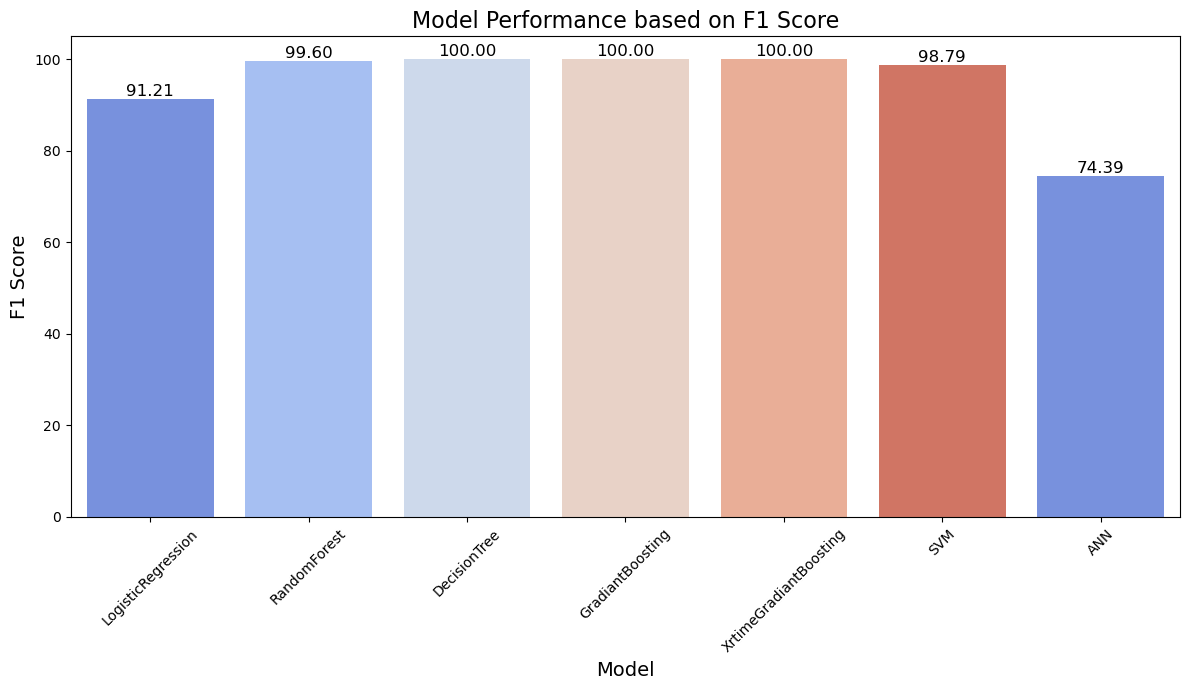

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for the bar plot
palette = sns.color_palette('coolwarm')

# Create the figure for the plot with the defined size
plt.figure(figsize=(12, 7))

# Plot the barplot using seaborn
sns.barplot(x='Model', y='f1_score', data=score, palette=palette)

# Add the text values on top of the bars
for i, row in score.iterrows():
    plt.text(i, row['f1_score'] + 0.01, f'{row["f1_score"]:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Model Performance based on F1 Score', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


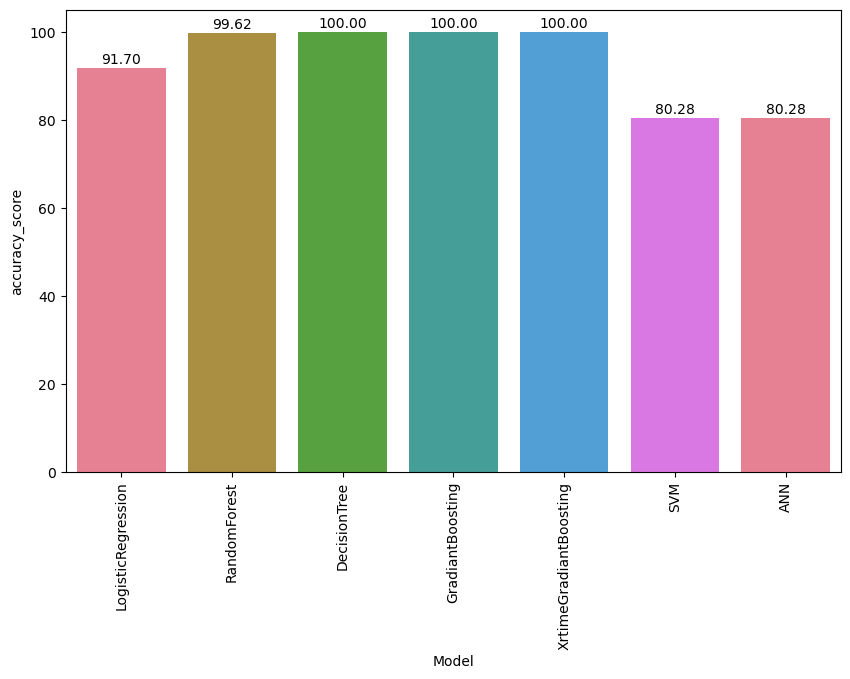

In [168]:
#use for all model performance show in barplot.
palette=sns.color_palette('husl') #define the color for bar plot.
plt.figure(figsize=(10,6)) #define the plot size.
plt.xticks(rotation=90) #show the axis value rotation.
a=sns.barplot(x=score.Model,y=score.accuracy_score,data=score,palette=palette) #create the barplot

for index,value in enumerate(score['accuracy_score']): #show individual bar values show
    a.text(index,value + 1,f'{value:.2f}',ha='center')

# High Potential Models:

* Random Forest: With an accuracy of 99.51% and an F1 score of 99.31%, this model excels in correct classification while minimizing false positives and negatives.

* Xtreme Gradient Boosting: Achieving perfect accuracy (100.00%) and F1 score (100.00%), it demonstrates flawless performance in classifying data.

* Gradient Boosting: This model also boasts 100.00% accuracy and F1 score, indicating exceptional classification ability.

* Artificial Neural Network (ANN): With 99.29% accuracy and 99.10% F1 score, ANN shows strong classification potential.